In [1]:
import numpy as np
import pandas as pd
from graspy.utils import * 
from graspy.plot import heatmap, pairplot, gridplot
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy
import networkx as nx
from graspy.embed import *
FONTSIZE = 20

In [2]:
herm = pd.read_excel('SI 3 Synapse lists.xlsx', sheet_name=0)
male = pd.read_excel('SI 3 Synapse lists.xlsx', sheet_name=1)
new_labels = ['num_contin', 'em_series', 'pre', 'all_post', 'type', 'sections',
 'num_post', 'post1', 'post2', 'post3', 'post4']
herm.columns = new_labels
male.columns = new_labels
herm_chem = herm.loc[herm['type'] == 'chemical']
herm_elec = herm.loc[herm['type'] == 'electrical']
male_chem = male.loc[male['type'] == 'chemical']
male_elec = male.loc[male['type'] == 'electrical']

In [3]:
def get_pre_post(row):
    pre = row.pre
    post_names = re.split('[, .]', row.all_post)
    pre = re.sub('[\[\] \\-#]', '', pre)
    post_names = [re.sub('[\[\] \\-#]', '', post) for post in post_names]
    return pre, post_names

def get_cells(df):
    names = set()
    for i, row in df.iterrows():
        pre, post_names = get_pre_post(row)
        names.add(pre)
        [names.add(post) for post in post_names]
    if '' in names:
        names.remove('')
    cell_ids = np.unique(list(names))
    inds = range(len(cell_ids))
    cell_id_map = dict(zip(cell_ids,inds))
    return cell_ids, cell_id_map

def df_to_adjacency(df, nodelist, weight=1, directed=True):
    rows = []
    for i, row in df.iterrows():
        pre, post_names = get_pre_post(row)
        for a in post_names:
            # pre | post | weight
            rows.append([pre, a, weight])
    
    df_split = pd.DataFrame(rows, columns=['source', 'target', 'weight'])
    if directed:
        g = nx.MultiDiGraph()
    else:
        g = nx.MultiGraph()
    g = nx.from_pandas_edgelist(df_split, create_using=g)
    return nx.to_numpy_array(g, nodelist=nodelist)


In [4]:
herm_cells, herm_cell_map = get_cells(herm_chem)
male_cells, male_cell_map = get_cells(male_chem)

In [5]:
herm_cells

array(['ADAL', 'ADAR', 'ADEL', 'ADER', 'ADFL', 'ADFR', 'ADLL', 'ADLR',
       'AFDL', 'AFDR', 'AIAL', 'AIAR', 'AIBL', 'AIBR', 'AIML', 'AIMR',
       'AINL', 'AINR', 'AIYL', 'AIYR', 'AIZL', 'AIZR', 'ALA', 'ALML',
       'ALMR', 'ALNL', 'ALNR', 'AQR', 'AS01', 'AS02', 'AS03', 'AS04',
       'AS05', 'AS06', 'AS10', 'AS11', 'ASEL', 'ASER', 'ASGL', 'ASGR',
       'ASHL', 'ASHR', 'ASIL', 'ASIR', 'ASJL', 'ASJR', 'ASKL', 'ASKR',
       'AUAL', 'AUAR', 'AVAL', 'AVAR', 'AVBL', 'AVBR', 'AVDL', 'AVDR',
       'AVEL', 'AVER', 'AVFL', 'AVFR', 'AVG', 'AVHL', 'AVHR', 'AVJL',
       'AVJR', 'AVKL', 'AVKR', 'AVL', 'AVL.', 'AVM', 'AWAL', 'AWAR',
       'AWBL', 'AWBR', 'AWCL', 'AWCR', 'BAGL', 'BAGR', 'BDUL', 'BDUR',
       'CANL', 'CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'CEPshDL', 'CEPshDR',
       'CEPshVL', 'CEPshVR', 'DA01', 'DA02', 'DA03', 'DA04', 'DA05',
       'DA06', 'DA07', 'DA08', 'DA09', 'DB01', 'DB02', 'DB03', 'DB04',
       'DB05', 'DB07', 'DB08', 'DD01', 'DD02', 'DD03', 'DD04', 'DD06',
       'DRO

In [6]:
male_cells

array(['ABL10', 'ABL12', 'ABL15', 'ABL2', 'ABL3', 'ABL6', 'ABL7', 'ABL??',
       'ABLP17', 'ABLP20', 'ABLP22', 'ABLP29', 'ABLfrag', 'ABR', 'ABR10',
       'ABR11', 'ABR12', 'ABR19', 'ABR3', 'ABR4', 'ABR6', 'ABRP10',
       'ABRP14', 'ABRP16', 'ABRP2', 'ABRP4', 'ADAL', 'ADEL', 'ADER',
       'ADFL', 'ADFR', 'ADLL', 'ADLR', 'AFDL', 'AFDR', 'AIAL', 'AIAL?',
       'AIALfrag?', 'AIAR', 'AIBL', 'AIBR', 'AIML', 'AIMR', 'AINL',
       'AINR', 'AIYL', 'AIYR', 'AIZL', 'AIZR', 'ALA', 'ALML', 'ALMR',
       'ALNL', 'ALNR', 'AQR', 'AS07', 'AS08', 'AS09', 'AS10', 'AS11',
       'ASEL', 'ASER', 'ASGL', 'ASGR', 'ASHL', 'ASHR', 'ASIL', 'ASIR',
       'ASJL', 'ASJR', 'ASKL', 'ASKR', 'AUAL', 'AUAR', 'AVAL', 'AVAR',
       'AVBL', 'AVBR', 'AVDL', 'AVDR', 'AVEL', 'AVER', 'AVFL', 'AVFR',
       'AVG', 'AVHL', 'AVHR', 'AVJL', 'AVJR', 'AVKL', 'AVKR', 'AVL',
       'AVM', 'AWAL', 'AWAR', 'AWBL', 'AWBR', 'AWCL', 'AWCR', 'BAGL',
       'BDUL', 'BDUR', 'CA02', 'CA03', 'CA04', 'CA05', 'CA06', 'CA07',
       'CA0

As shown above, many of the cell labels are a mess, even after using regexps to try to get rid of some of the discrepancies. For the rest of the is analysis, I will use cells that are in both the male and hermaphrodite graphs, and also exist in the cell attributes list on WormWiring

In [7]:
types = pd.read_excel('NeuronType.xls')
names = types['Neuron'].values
int_cells = np.intersect1d(male_cells, herm_cells)
labeled_cells = np.intersect1d(int_cells, names)
num_cells = labeled_cells.shape[0]

In [8]:
labeled_cells

array(['ADAL', 'ADEL', 'ADER', 'ADFL', 'ADFR', 'ADLL', 'ADLR', 'AFDL',
       'AFDR', 'AIAL', 'AIAR', 'AIBL', 'AIBR', 'AIML', 'AIMR', 'AINL',
       'AINR', 'AIYL', 'AIYR', 'AIZL', 'AIZR', 'ALA', 'ALML', 'ALMR',
       'ALNL', 'ALNR', 'AQR', 'AS10', 'AS11', 'ASEL', 'ASER', 'ASGL',
       'ASGR', 'ASHL', 'ASHR', 'ASIL', 'ASIR', 'ASJL', 'ASJR', 'ASKL',
       'ASKR', 'AUAL', 'AUAR', 'AVAL', 'AVAR', 'AVBL', 'AVBR', 'AVDL',
       'AVDR', 'AVEL', 'AVER', 'AVFL', 'AVFR', 'AVG', 'AVHL', 'AVHR',
       'AVJL', 'AVJR', 'AVKL', 'AVKR', 'AVL', 'AVM', 'AWAL', 'AWAR',
       'AWBL', 'AWBR', 'AWCL', 'AWCR', 'BAGL', 'BDUL', 'BDUR', 'CEPDL',
       'CEPDR', 'CEPVL', 'CEPVR', 'DA04', 'DA05', 'DA06', 'DA07', 'DA08',
       'DA09', 'DB03', 'DB04', 'DB05', 'DB07', 'DD03', 'DD04', 'DD06',
       'DVA', 'DVB', 'DVC', 'FLPL', 'FLPR', 'IL1DL', 'IL1DR', 'IL1L',
       'IL1R', 'IL1VL', 'IL1VR', 'IL2DL', 'IL2DR', 'IL2L', 'IL2R',
       'IL2VL', 'IL2VR', 'LUAL', 'LUAR', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR',
       '

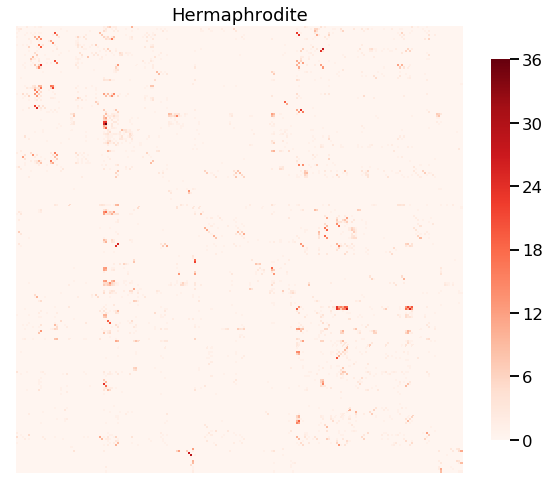

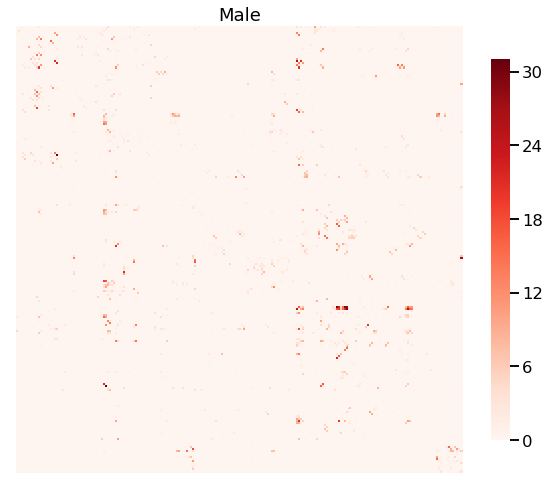

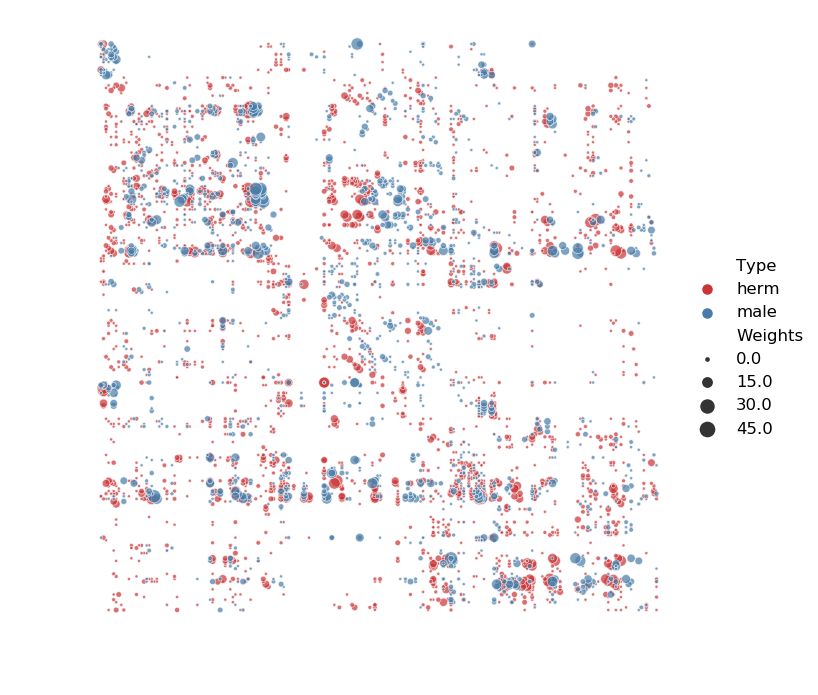

In [9]:
male_chem_A = df_to_adjacency(male_chem, labeled_cells)
herm_chem_A = df_to_adjacency(herm_chem, labeled_cells)
heatmap(herm_chem_A, title='Hermaphrodite')
heatmap(male_chem_A, title='Male')
gridplot([herm_chem_A, male_chem_A], labels=['herm', 'male'],)

In [10]:
omni = OmnibusEmbed()
X_compound, Y_compound = omni.fit_transform([herm_chem_A, male_chem_A])
# splitting the embedding back up after omnibus
herm_X = X_compound[:herm_chem_A.shape[0],:]
male_X = X_compound[male_chem_A.shape[0]:,:]
herm_Y = Y_compound[:herm_chem_A.shape[0],:]
male_Y = Y_compound[male_chem_A.shape[0]:,:]

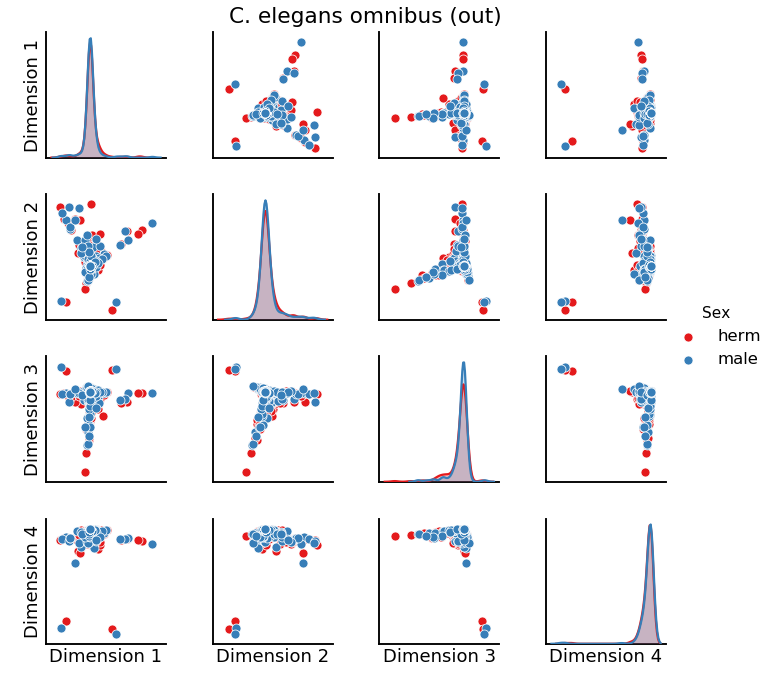

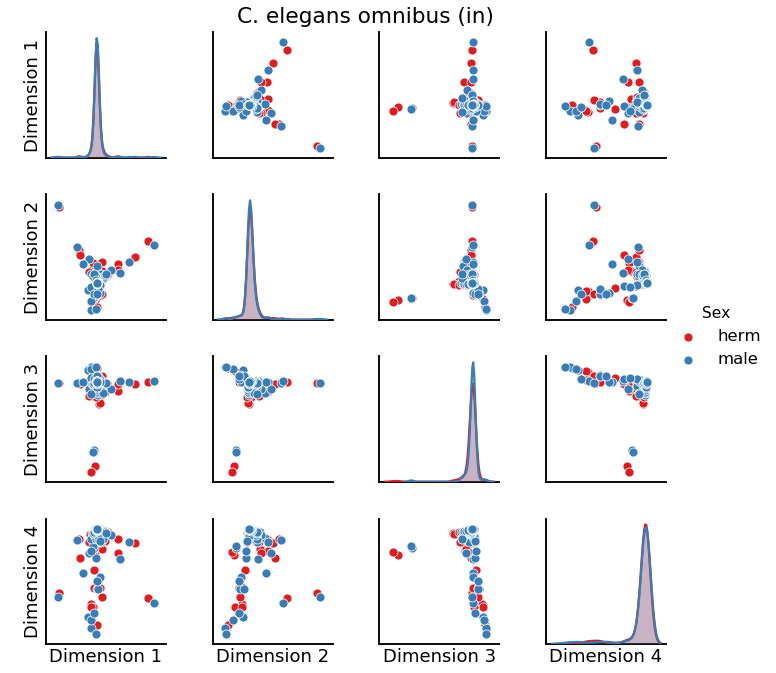

In [11]:
labels = num_cells*['herm'] + num_cells*['male'] 
pairplot(X_compound, Y=labels, title='C. elegans omnibus (out)', legend_name='Sex')
pairplot(Y_compound, Y=labels, title='C. elegans omnibus (in)',  legend_name='Sex')

In [17]:
cell_info = types.set_index('Neuron')
axial_position = np.zeros_like(labeled_cells)
ganglion = []
for i, cell in enumerate(labeled_cells):
    axial_position[i] = cell_info.loc[cell, 'Soma Position']
    ganglion.append(cell_info.loc[cell, ' AY Ganglion Designation'])

In [18]:
cell_info

,Soma Position,Soma Region,Span,Ambiguity,TotHead,TotTail,TotMid,S_Head,R_Head,S_Mid,R_Mid,S_Tail,R_Tail,AY Ganglion Designation,AYNbr
Neuron,,,,,,,,,,,,,,,
ADAL,0.21,H,S,NaN,47,0,0,33,8,0,0,0,0,E,141
ADAR,0.21,H,S,NaN,40,0,0,24,10,0,0,0,0,E,142
ADEL,0.21,H,S,NaN,57,0,0,45,10,0,0,0,0,E,143
ADER,0.21,H,S,NaN,51,0,0,38,12,0,0,0,0,E,144
ADFL,0.13,H,L,NaN,52,0,0,39,12,0,0,0,0,C,45
ADFR,0.14,H,L,NaN,61,0,0,43,16,0,0,0,0,C,46
ADLL,0.13,H,L,NaN,50,0,0,43,3,0,0,0,0,C,47
ADLR,0.14,H,L,NaN,51,0,0,46,4,0,0,0,0,C,48
AFDL,0.13,H,L,NaN,21,0,0,8,11,0,0,0,0,C,49


# Axial position of soma plotted against each embedded dimension

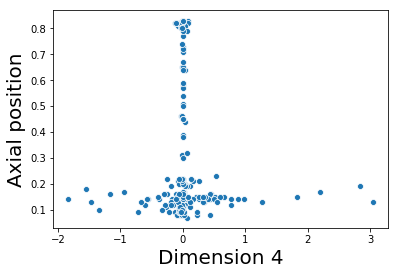

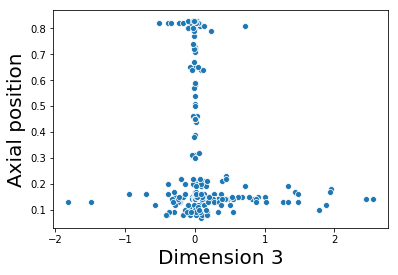

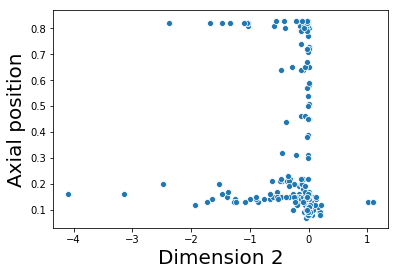

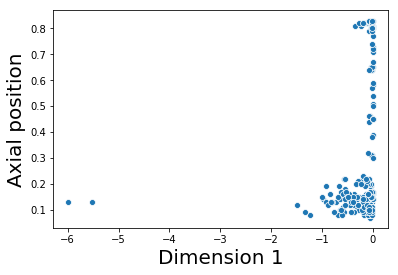

In [35]:
for axis in range(male_X.shape[1]):
    ax = sns.scatterplot(herm_X[:,axis], axial_position)
    ax.set_ylabel('Axial position', fontsize=FONTSIZE)
    ax.set_xlabel('Dimension {}'.format(4 - axis), fontsize=FONTSIZE)
    plt.show()

# Pairplots for both sexes, colored by the AY ganglionic designation from WormWiring

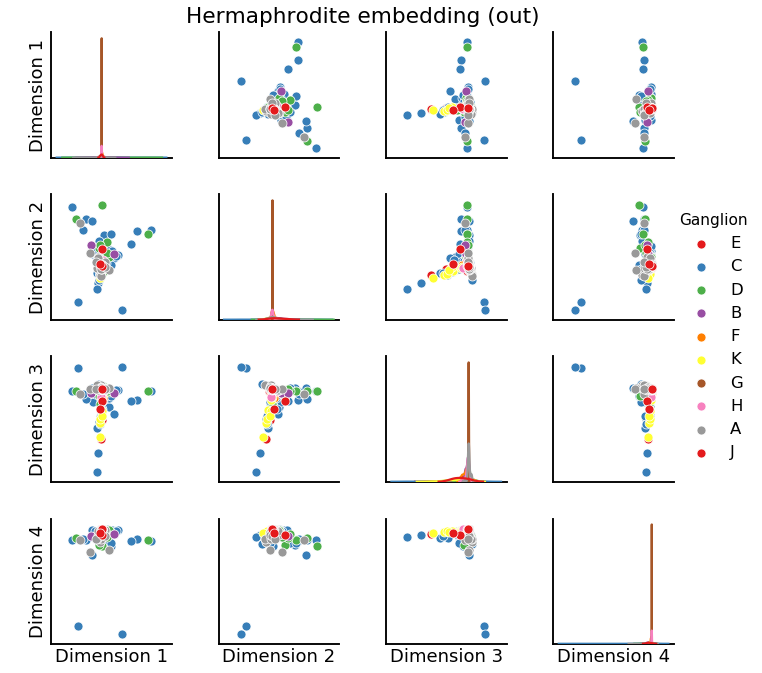

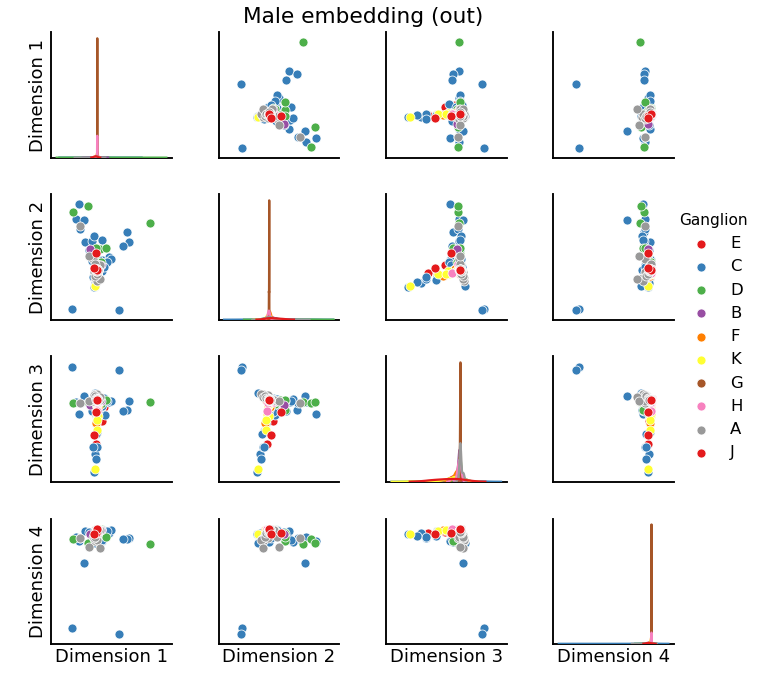

In [20]:
pairplot(herm_X, Y=ganglion, title='Hermaphrodite embedding (out)', legend_name='Ganglion')
pairplot(male_X, Y=ganglion, title='Male embedding (out)', legend_name='Ganglion')

In [21]:
lineage_1 = pd.read_excel('NeuronLineage_part1.xls')
lineage_2 = pd.read_excel('NeuronLineage_part2.xls')

In [22]:
lineage = lineage_1.append(lineage_2, ignore_index=True)


In [23]:
lineage_graph = nx.from_pandas_edgelist(lineage,
                                         source='Neuron 1',
                                         target='Neuron 2',
                                         edge_attr='Relatedness')
lineage_A = nx.to_numpy_array(lineage_graph, 
                              nodelist=labeled_cells,
                              weight='Relatedness')

In [24]:
def compute_euclidean_distances(X):
        """
        Computes pairwise distance between row vectors or matrices

        Parameters
        ----------
        X : nd-array
            If ``dissimilarity=='precomputed'``, the input should be the 
            dissimilarity matrix with shape (n_samples, n_samples). If 
            ``dissimilarity=='euclidean'``, then the input should be array 
            with shape (n_samples, n_features) or a nd-array with shape 
            (n_samples, n_features_1, n_features_2, ..., n_features_d).
        
        Returns
        -------
        out : 2d-array, shape (n_samples, n_samples)
            A dissimilarity matrix based on Frobenous norms between pairs of
            matrices or vectors.
        """
        shape = X.shape
        n_samples = shape[0]

        out = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            out[i] = np.linalg.norm(X - X[i], axis=(1, 2), ord='fro')

        return out

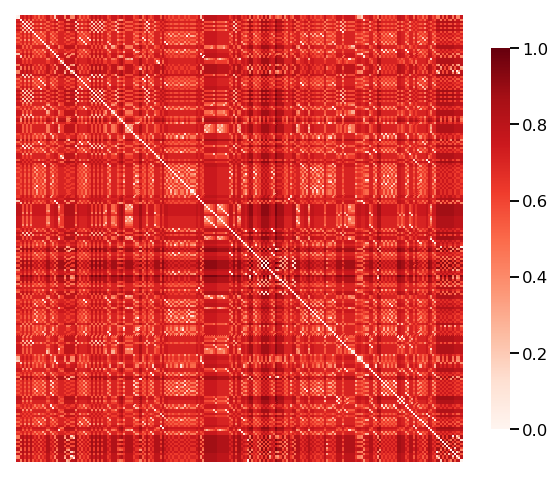

In [25]:
heatmap(lineage_A/lineage_A.max())

In [26]:
def compute_euclidean_distances(X):
    d = np.zeros((X.shape[0], X.shape[0]))
    for i in range(X.shape[0]):
        d[i] = np.linalg.norm(X - X[i], axis=1)
    return d

In [27]:
embed_dist_male_X = compute_euclidean_distances(male_X)

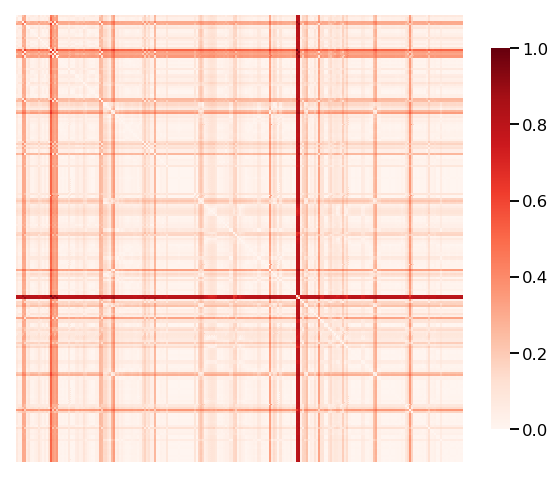

In [28]:
heatmap(embed_dist_male_X/embed_dist_male_X.max())

In [29]:
mds = ClassicalMDS(n_components=2, dissimilarity='precomputed')
mds_lineage_A = mds.fit_transform(lineage_A)
mds_embedding_X = mds.fit_transform(embed_dist_male_X)

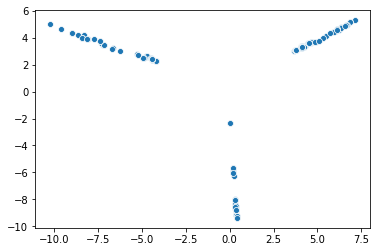

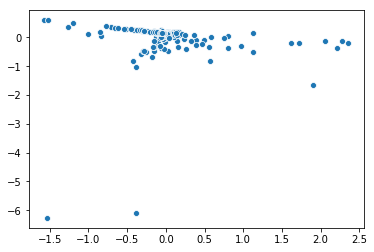

In [30]:
sns.scatterplot(mds_lineage_A[:,0], mds_lineage_A[:,1])
plt.show()
sns.scatterplot(mds_embedding_X[:,0], mds_embedding_X[:,1])

In [31]:
from scipy.spatial import distance

def dist_transform(A, B, corr_type):
    '''Transform the distance matrices in a specified way
    :param A, B: n*n distance matrix
    :param corr_type: a string indicating which global correlation to build upon, e.g. 'dcorr'
    :return: C, D: the transformed matrices
    '''

    C = dist_center(A, corr_type)
    D = dist_center(B, corr_type)

    return (C, D)


def dist_center(A, corr_type):
    '''Center the distance matrix as specified by the correlation test
    that uses it
    :param A: an n*n distance matrix to be centered
    :param corr_type: a string specifying which centering scheme to use, e.g. 'dcorr'
    :return: C: the centered matrix
    '''
    # the dimension of A
    n = A.shape[0]

    # the centering scheme makes the difference among dcorr, mcorr
    # and mantel

    # unbiased dcorr transform
    if corr_type == 'dcorr':
        '''
        all the means are not divided by n exactly so that the transform is unbiased
        the mean taken over the rows
        convert the vector of row means into matrix so that entries in
        the same column has the same row mean
        can be directly subtract off later
        '''
        row_mean = np.tile(np.sum(A, axis=0)/(n-2), (n, 1))
        # the mean taken over the columns
        # convert into matrix so that entries in the same row has the same column mean
        col_mean = np.tile(np.sum(A, axis=1)[:, np.newaxis]/(n-2), (1, n))
        # mean of all the entries
        grand_mean = np.sum(A)/(n-1)/(n-2)
        # the quantity which we adjust A with
        adjustment = row_mean + col_mean - grand_mean

    # mantel transform
    elif corr_type == 'mantel':
        # mean of all the entries (scaled differently than in dcorr)
        adjustment = np.sum(A)/n/(n-1)

    # "default mgc transform" used in fastmgc
    elif corr_type == 'mcorr':
        adjustment = np.tile(np.sum(A, axis=0)/(n-1), (n, 1))

    # the centered matrix
    C = A - adjustment
    # the diagonal entries should always be zero
    for j in range(n):
        C[j, j] = 0

    return C

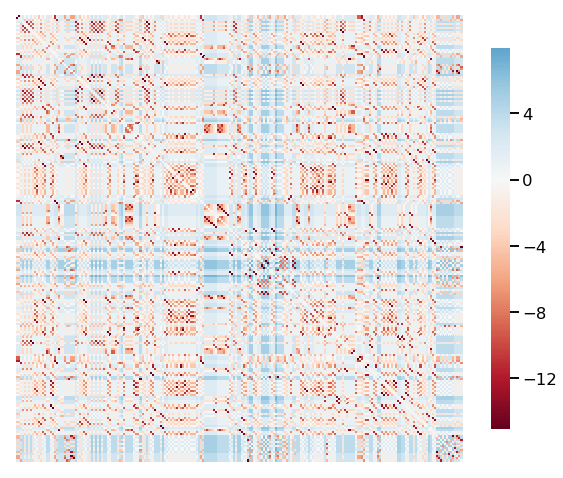

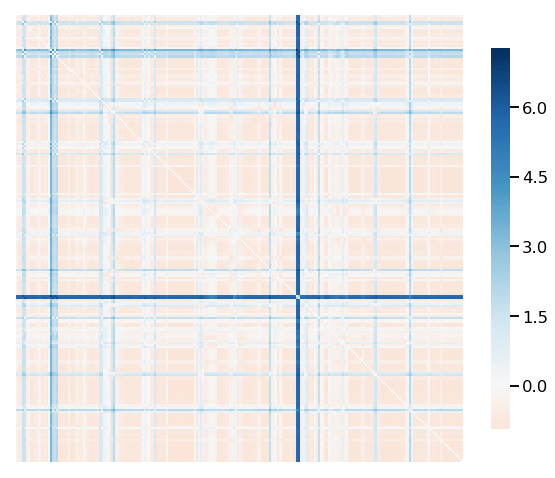

In [32]:
A,B = dist_transform(lineage_A, embed_dist_male_X, 'mantel')
heatmap(A, center=0, cmap='RdBu')
heatmap(B, center=0, cmap='RdBu')

In [38]:
male_chem_A

lse = LaplacianSpectralEmbed()
lse.fit_transform(male_chem_A)
# lse should throw an error when there is a 0 valued node in the whole thing 

c:\users\owner\envs\pygraph\lib\site-packages\graspy\utils\utils.py:145: RuntimeWarning: divide by zero encountered in power
  D_root = np.diag(D_vec ** -0.5)
c:\users\owner\envs\pygraph\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1817: RuntimeWarning: invalid value encountered in maximum
  eigvals = np.maximum(eigvals.real, 0)
c:\users\owner\envs\pygraph\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\users\owner\envs\pygraph\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1827: RuntimeWarning: invalid value encountered in greater
  above_cutoff = (eigvals > cutoff)
c:\users\owner\envs\pygraph\lib\site-packages\scipy\stats\_distn_infrastructure.py:1694: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\owner\envs\pygraph\lib\site-packages\scipy\stats\_distn_infrastructure.py:876: Ru

(array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0

In [48]:
ins = np.sum(herm_chem_A, axis=1)
outs = np.sum(herm_chem_A, axis=0)
for i in range(len(ins)):
    if ins[i]==0 and outs[i]==0:
        print(i)

128


128
